### Overview 🤩

- Zero padding
- Convolution operation

Further details of the tasks are provided below.

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

### Understanding image matrix 

Original Spidey Dimension: (466, 350, 3)
Greyscaled Image Dimensions: (466, 350)


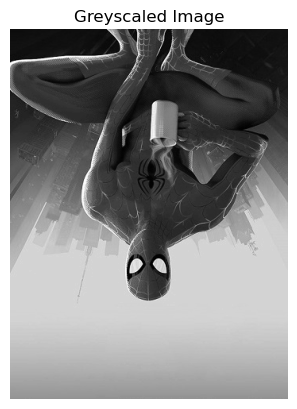

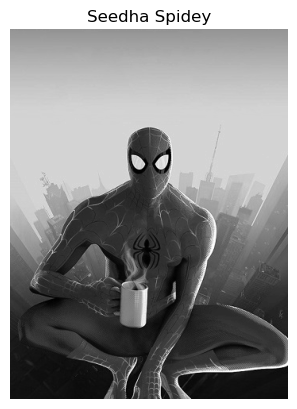

In [2]:
image_path = 'assets/upside-down-me.jpg'
original_image = cv2.imread(image_path)
original_dimensions = original_image.shape
print("Original Spidey Dimension:", original_dimensions)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
gray_dimensions = gray_image.shape
print("Greyscaled Spidey Dimensions:", gray_dimensions)
plt.imshow(gray_image, cmap='gray')
plt.title('Greyscaled Spidey')
plt.axis('off')
plt.show()


upright_image = np.rot90(gray_image, 2) 
plt.imshow(upright_image, cmap='gray')
plt.title('Seedha Spidey')
plt.axis('off')
plt.show()

### Zero-Padding 
Zero-padding adds zeros around the border of an image:

The main benefits of padding are the following:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

In [3]:
def zero_pad(X, pad): # change this because this may be the cause of slow convolution
    """
    Arguments:
    X -- python numpy array of shape (H, W) representing an image where H represents the height and W represents the width
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """
    H = X.shape[0]
    W = X.shape[1]
    H_padding = H + 2 * pad
    W_padding = W + 2 * pad
    X_pad = np.zeros((H_padding, W_padding))
    X_pad[pad:H+pad, pad:W+pad] = X # putting data in the middle of the new zero numpy array 
    
    return X_pad


[[ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.62434536 -0.61175641 -0.52817175  0.
   0.        ]
 [ 0.          0.         -1.07296862  0.86540763 -2.3015387   0.
   0.        ]
 [ 0.          0.          1.74481176 -0.7612069   0.3190391   0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]
Shape of x_pad:  (7, 7)


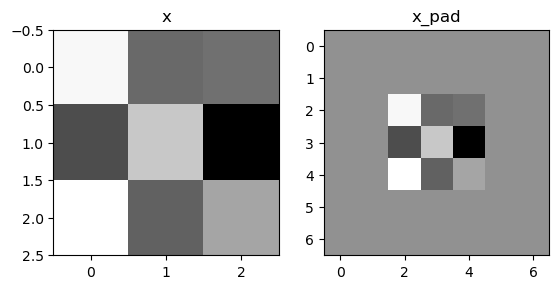

In [4]:
np.random.seed(1)
x = np.random.randn(3, 3)
x_pad = zero_pad(x, 2)
print(x_pad)
print("Shape of x_pad: ", x_pad.shape)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

### 2D Convolution 

2D covolution is the process of applying a filter to an image. Making a convolutional unit.
- Takes an input image
- Applies a filter keeping as per padding and stride parameters
- Outputs another image (usually, but not necessarily, of different size)

In [ ]:
def conv2D(inp, F, pad, stride):
    n_H =inp.shape[0]
    n_W =inp.shape[1]
    f = F.shape[0]
    n_H_output_dimensions = int((n_H + 2 * pad - f) / stride) + 1
    n_W_output_dimensions = int((n_W + 2 * pad - f) / stride) + 1
    inp = zero_pad(inp, pad)
    conv_output = np.zeros((n_H_output_dimensions, n_W_output_dimensions))
    for i in range(0, n_H - f + 1, stride):
        for j in range(0, n_W - f + 1, stride):
            conv_region_on_image = inp[i:i+f, j:j+f]
            conv_output[i // stride, j // stride] = np.sum(conv_region_on_image * F)
    return conv_output


### Testing Convolution 


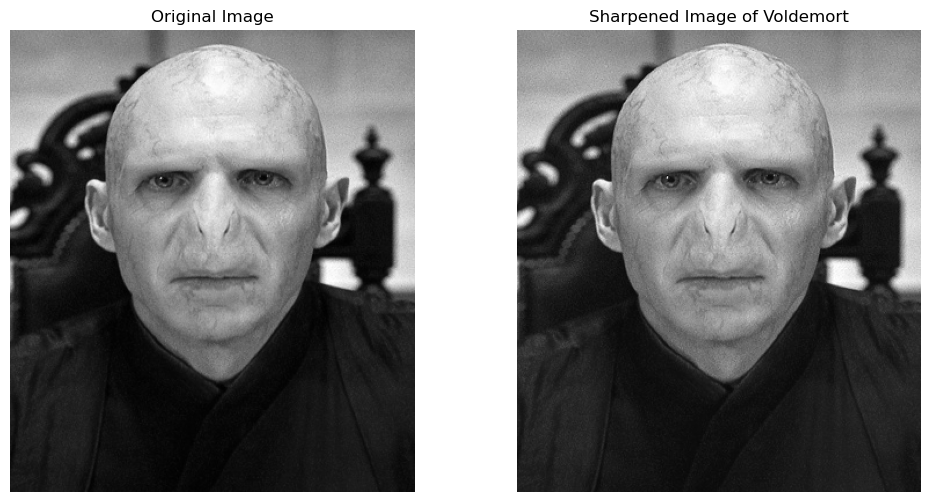

In [6]:
voldemort_path = 'assets/voldemort.jpg'
voldemort_image = cv2.imread(voldemort_path)
gray_voldemort = cv2.cvtColor(voldemort_image, cv2.COLOR_BGR2GRAY)
resized_voldemort = cv2.resize(gray_voldemort, (350, 400))
sharpening_filter = np.array([[0, -1, 0],
                              [-1, 20, -1],
                              [0, -1, 0]])
sharpened_image = conv2D(resized_voldemort, sharpening_filter, pad=0, stride=1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(resized_voldemort, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image of Voldemort')
plt.axis('off')

plt.show()

### Edge Detection

In [7]:
images_folder = 'Images'

subfolders = os.listdir(images_folder)
input_images = []
image_names = []
for subfolder in subfolders:
    subfolder_path = os.path.join(images_folder, subfolder)
    image_files = os.listdir(subfolder_path)
    image_names.extend(image_files)
    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.imread(image_path)
        input_images.append(image)

In [8]:
print(f"The total number of Images picked up : {len(image_names)}")
print(f"Image Names : {(image_names)}")

The total number of Images picked up : 12
Image Names : ['diagonal5.jpg', 'diagonal1.jpg', 'circles2.jpg', 'circles1.png', 'diagonal4.jpg', 'diagonal2.jpg', 'vertical1.png', 'vertical2.jpg', 'vertical3.jpg', 'horizontal3.jpg', 'horizontal2.jpg', 'horizontal1.png']


In [9]:
preprocessed_list_of_images = []
target_size = (350, 400)
for i in range(len(input_images)):
    image = input_images[i]
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, target_size)
    preprocessed_list_of_images.append((image_names[i], resized_image))


In [10]:
print(len(preprocessed_list_of_images))

12


In [11]:
print(f"This is the first image that is preprocessed and resized in its vector form: {preprocessed_list_of_images[0]}")

This is the first image that is preprocessed and resized in its vector form: ('diagonal5.jpg', array([[236, 236, 236, ..., 236, 236, 236],
       [236, 236, 236, ..., 236, 236, 236],
       [236, 236, 236, ..., 236, 236, 236],
       ...,
       [236, 236, 236, ..., 236, 236, 236],
       [236, 236, 236, ..., 236, 236, 236],
       [236, 236, 236, ..., 236, 236, 236]], dtype=uint8))


#### Horizontal Filter 🚥

In [12]:
for i in range(len(preprocessed_list_of_images)):
    print(preprocessed_list_of_images[i][0])

diagonal5.jpg
diagonal1.jpg
circles2.jpg
circles1.png
diagonal4.jpg
diagonal2.jpg
vertical1.png
vertical2.jpg
vertical3.jpg
horizontal3.jpg
horizontal2.jpg
horizontal1.png


In [13]:
def filter_applier(images_list, kernel):
    edge_results = []
    for image_name, image in images_list:
        edge_result = conv2D(image, kernel, pad=0, stride=1)
        edge_results.append(edge_result)
    plt.figure(figsize=(12, 6))
    for i, (original_image, edge_result) in enumerate(zip(images_list, edge_results), 1):
        plt.subplot(2, 3, i)
        plt.imshow(original_image[1], cmap='gray')
        plt.title(f'Original Image of {image_name[i]}')
        plt.axis('off')
        plt.subplot(2, 3, i + 3)
        plt.imshow(edge_result, cmap='gray')
        plt.title(f' Edge Detection Result of {image_name[i]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


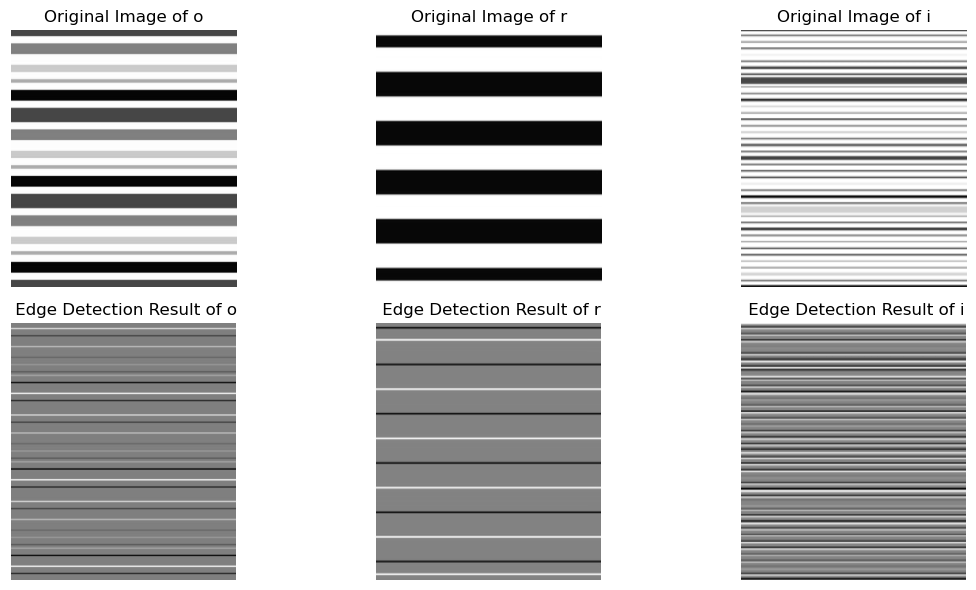

In [14]:
# initialize and apply horizontal edge detection filter on images in "Horizontal Lines" folder and display the results
horizontal_preprocessed_images = preprocessed_list_of_images[-3:]
h_filter = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])
filter_applier(horizontal_preprocessed_images,h_filter)


#### Vertical Filter 🚦

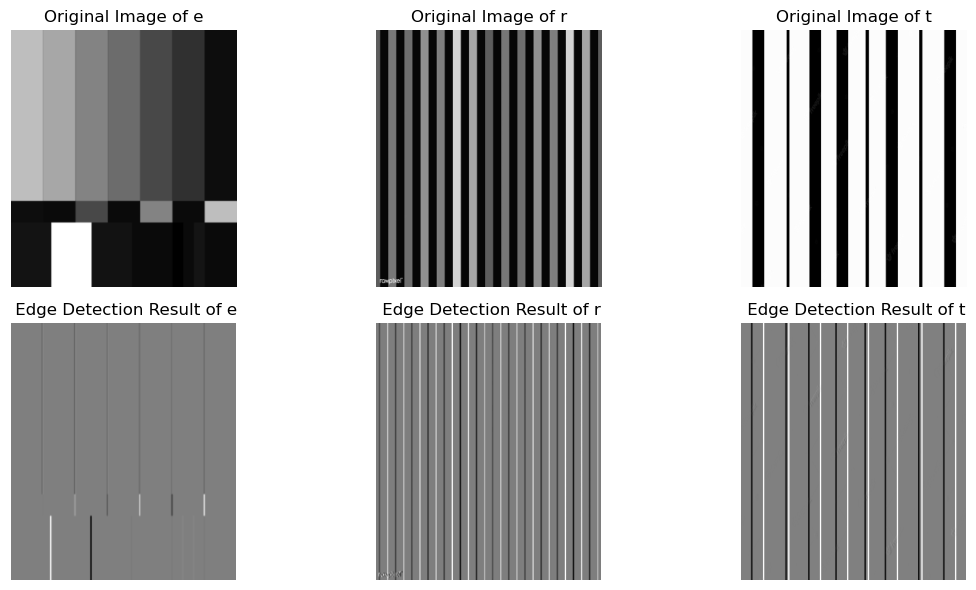

In [39]:
# initialize and apply vertical edge detection filter on images in "Vertical Lines" folder and display the results
vertical_preprocessed_images = preprocessed_list_of_images[6:9]
v_filter = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
### Code Here ###
filter_applier(vertical_preprocessed_images, v_filter)


#################

#### Right to Left Diagonal Filter 🙆🏻‍♂️

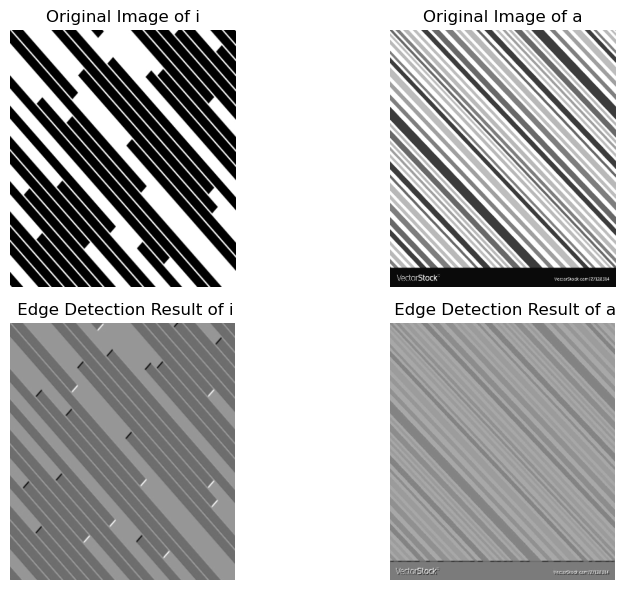

In [16]:
# initialize and apply right-to-left diagonal edge detection filter on the images in "Right to Left" folder and display the results
rl_diagonal_images = preprocessed_list_of_images[4:6]

rlDiag_filter = np.array([[-1, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 1]])

filter_applier(rl_diagonal_images, rlDiag_filter)



#################

#### Left to Right Diagonal Filter 🙆🏻‍♀️

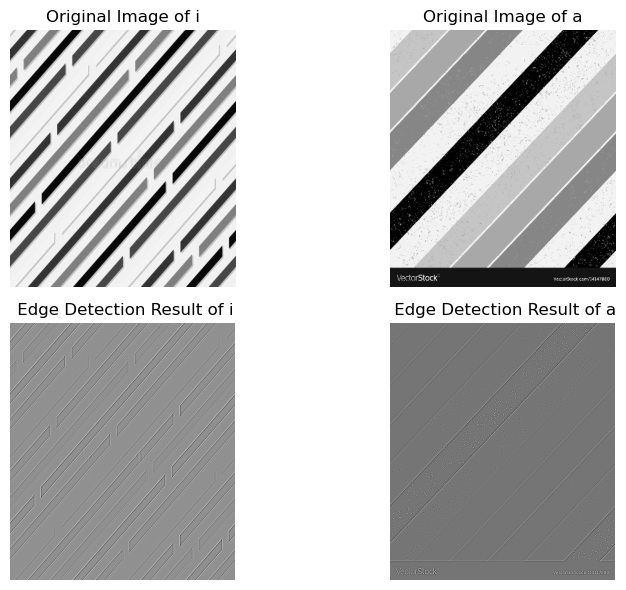

In [17]:
# initialize and apply left-to-right diagonal edge detection filter on the images in "Left to Right" folder and display the results
lr_diagonal_images = preprocessed_list_of_images[0:2]
lrDiag_filter = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])
filter_applier(lr_diagonal_images, lrDiag_filter)


#### Circle Filter ⭕

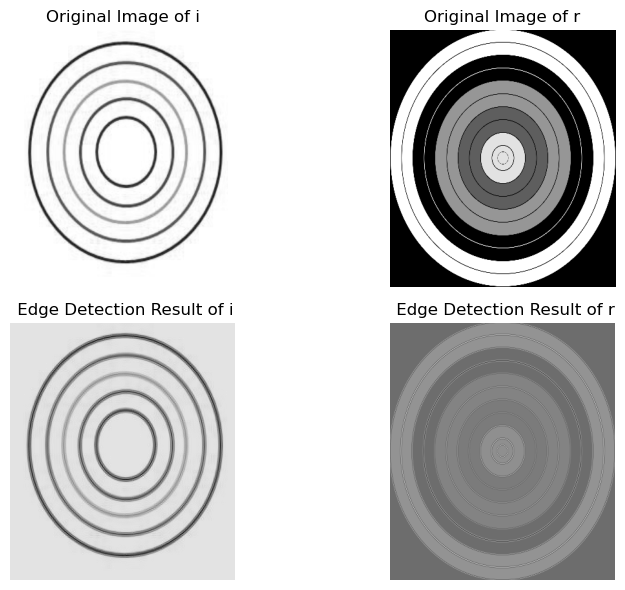

In [49]:
# initialize and apply circular pattern's edge detection filter on the images in "Circles" folder and display the results.
circle_images = preprocessed_list_of_images[2:4]
c_filter = np.array([[0, 1, 0],
                          [1, -3, 1],
                          [0, 1, 0]])
filter_applier(circle_images, c_filter)


#### Fun Part 👻

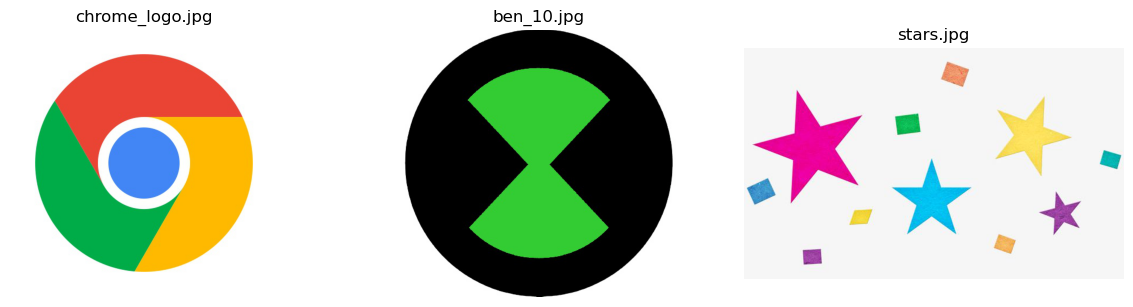

In [19]:
target_folder = 'Target_Images'
target_image_files = os.listdir(target_folder) 
target_image_names = []
target_images = []
for target_image_file in target_image_files:
    target_image_path = os.path.join(target_folder, target_image_file)
    target_image = cv2.imread(target_image_path)
    target_images.append(target_image)
    target_image_names.append(target_image_file)
plt.figure(figsize=(12, 6))
for i, target_image in enumerate(target_images, 1):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{target_image_names[i-1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Combining Filters (18 Marks) ☠️

In [20]:
def mean_squared_error(img1, img2):
    return np.mean((img1 - img2) ** 2)

In [21]:
def filter_combination(original_image, filter_list):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    preprocessed_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    preprocessed_image = cv2.resize(preprocessed_image, (350, 400))
    plt.subplot(2, 3, 2)
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')

    padding_size = filter_list[0].shape[1] // 2
    # print(f"The padding used in this case is: {padding_size}")
    kernel = sum(filter_list)
    #print(f"The filter used in this case is {kernel}")
    conv_result = conv2D(preprocessed_image, kernel, padding_size, 1)
    # print("convolution done")
    plt.subplot(2, 3, 3)
    plt.imshow(conv_result, cmap='gray')
    plt.title('Convolution Result')
    plt.axis('off')
    mse = mean_squared_error(preprocessed_image, conv_result)
    print(f'MSE: {mse}')


MSE: 5183.065285714286


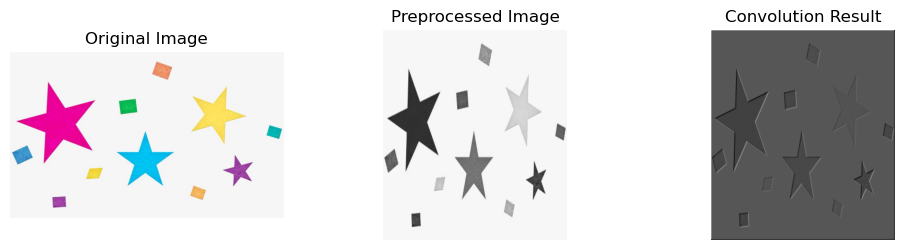

In [22]:
# initialize and apply detection filter on "stars.jpg" image and display result
stars_image = target_images[2]
# plt.imshow(stars_image)
# plt.show()

stars_filter  = [lrDiag_filter, rlDiag_filter]
filter_combination(stars_image, stars_filter)

### Code Here ###



#################

MSE: 1078751.2145714285


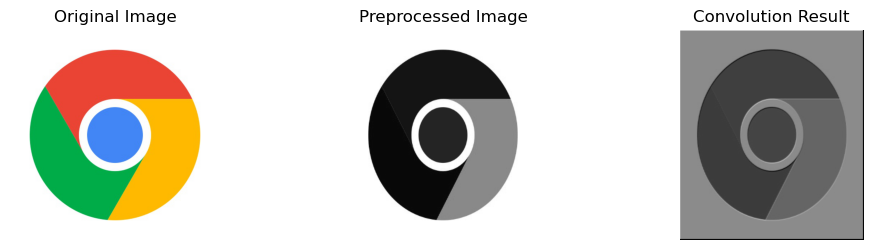

In [23]:
# initialize and apply detection filter on "chrome_logo.jpg" image and display result
chrome_image = target_images[0]
# plt.imshow(chrome_image)
# plt.show()
chrome_filter = [lrDiag_filter,rlDiag_filter,h_filter,c_filter]
filter_combination(chrome_image, chrome_filter)

### Code Here ###



#################

MSE: 493633.48285714287


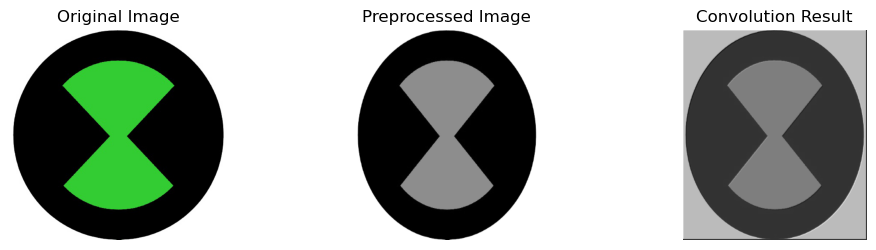

In [24]:
# initialize and apply detection filter on "ben_10.jpg" image and display result
ben10_image = target_images[1]
# plt.imshow(bem10_image)
# plt.show()
ben10_filter = [lrDiag_filter,rlDiag_filter,c_filter]
filter_combination(ben10_image,ben10_filter)
### Code Here ###



#################

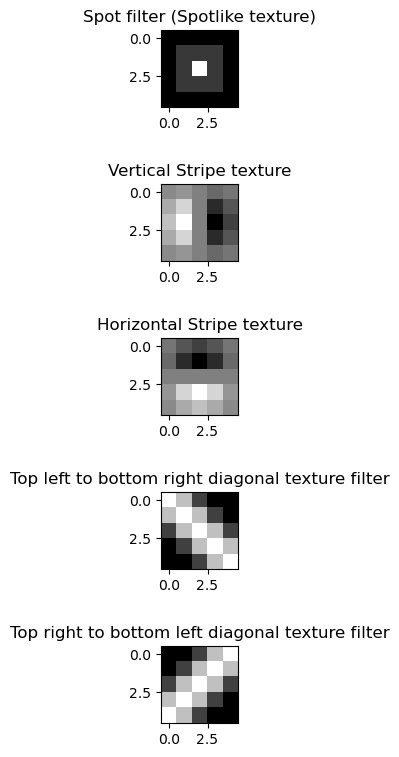

In [25]:
# Spot filter (Spotlike texture)
spot = np.array([[-1, -1, -1, -1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1,  1,  8,  1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1, -1, -1, -1, -1]])

# Vertical filter (Vertical Stripe texture)
vertical = np.array([[1, 2, 0, -2, -1],
                     [4, 8, 0, -8, -4],
                     [6,12, 0,-12, -6],
                     [4, 8, 0, -8, -4],
                     [1, 2, 0, -2, -1]])

# Horizontal filter (Horizontal Stripe texture)
horizontal = np.array([[-1, -4, -6, -4, -1],
                      [-2, -8,-12, -8, -2],
                      [ 0,  0,  0,  0,  0],
                      [ 2,  8, 12,  8,  2],
                      [ 1,  4,  6,  4,  1]])

# Diagonal filter (top left To bottom right)
diagonal_tlTbr = np.array([
                      [ 2,  1, -1, -2, -2],
                      [ 1,  2,  1, -1, -2],
                      [-1,  1,  2,  1, -1],
                      [-2, -1,  1,  2,  1],
                      [-2, -2, -1,  1,  2]])

# Diagonal filter (top right To bottom left)
diagonal_trTbl = np.array([
                      [-2, -2, -1,  1,  2],
                      [-2, -1,  1,  2,  1],
                      [-1,  1,  2,  1, -1],
                      [ 1,  2,  1, -1, -2],
                      [ 2,  1, -1, -2, -2]])

fig, axarr = plt.subplots(5, 1)
axarr[0].set_title('Spot filter (Spotlike texture)')
axarr[0].imshow(spot,cmap='gray')

axarr[1].set_title('Vertical Stripe texture')
axarr[1].imshow(vertical,cmap='gray')

axarr[2].set_title('Horizontal Stripe texture')
axarr[2].imshow(horizontal,cmap='gray')

axarr[3].set_title('Top left to bottom right diagonal texture filter')
axarr[3].imshow(diagonal_tlTbr,cmap='gray')

axarr[4].set_title('Top right to bottom left diagonal texture filter')
axarr[4].imshow(diagonal_trTbl,cmap='gray')

fig.set_size_inches(6, 9)
plt.subplots_adjust(hspace=1)

In [26]:
web_lines_filter = np.array([[-1, -1, 2, -1, -1],
                             [-1, 2, -1, 2, -1],
                             [2, -1, -1, -1, 2],
                             [-1, 2, -1, 2, -1],
                             [-1, -1, 2, -1, -1]])


gaussian_filter = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256
sobel_horizontal_5x5 = np.array([[-2, -4, 0, 4, 2],
                                  [-3, -6, 0, 6, 3],
                                  [-4, -8, 0, 8, 4],
                                  [-3, -6, 0, 6, 3],
                                  [-2, -4, 0, 4, 2]])



sobel_vertical_5x5 = np.array([[-2, -3, -4, -3, -2],
                                [-4, -6, -8, -6, -4],
                                [0, 0, 0, 0, 0],
                                [4, 6, 8, 6, 4],
                                [2, 3, 4, 3, 2]])

log_filter_5x5 = np.array([[-1, -1, -2, -2, -2],
                           [-1, -2, -4, -4, -4],
                           [-2, -4, 24, -8, -2],
                           [-2, -4, -8, -2, -1],
                           [-2, -4, -2, -1, -1]])


In [27]:
filter_bank = [sobel_horizontal_5x5, sobel_vertical_5x5, log_filter_5x5, web_lines_filter, gaussian_filter]

# Image Classification

In [29]:
# making a pooling function to compute average pooling
def average_pooling(inp,F, stride):
    pad = 0
    (n_H, n_W) = inp.shape
    f = F
    n_H_out = int((n_H + 2 * pad - f) / stride) + 1
    n_W_out = int((n_W + 2 * pad - f) / stride) + 1
    inp = zero_pad(inp, pad)

    # Create an empty array for the convolution output
    pooling_output = np.zeros((n_H_out, n_W_out))
    # Apply convolution
    for i in range(0, n_H - f + 1, stride):
        for j in range(0, n_W - f + 1, stride):
            roi = inp[i:i+f, j:j+f]
            pooling_output[i // stride, j // stride] = np.mean(roi)
    return pooling_output


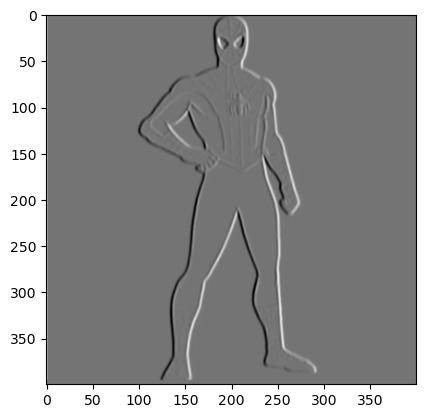

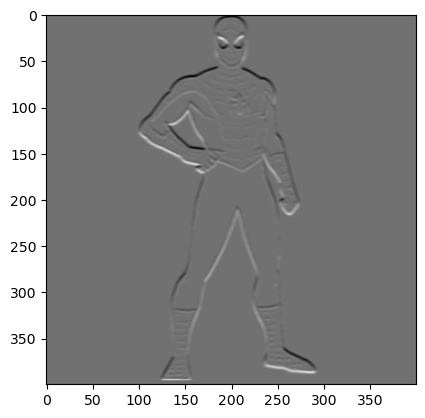

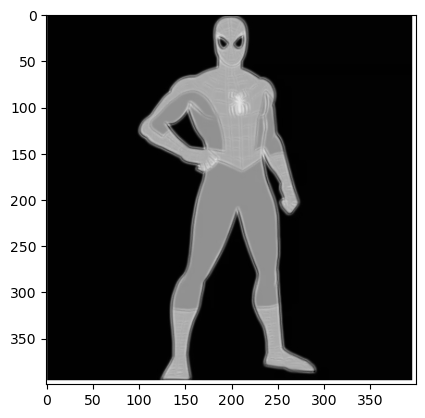

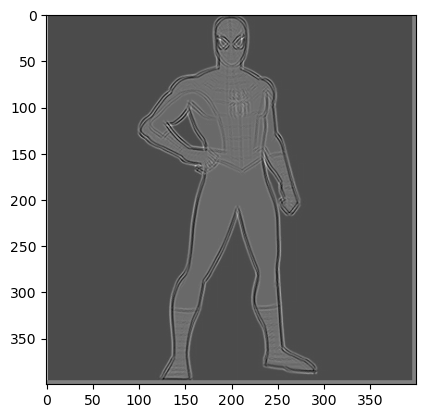

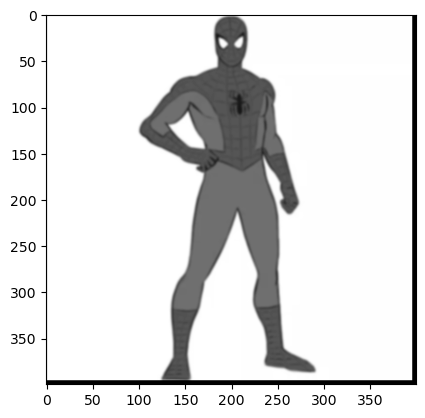

this is the number of feature vectors; 5 and this is the shape of each vector in this (1600,)
this is the shape of the feature matrix: (5, 1600)


In [30]:
spidey_path = "./classification/train_spidey.jpg"
spidey_image = cv2.imread(spidey_path)
# plt.imshow(spidey_image)
# plt.show()
spidey_gray = cv2.cvtColor(spidey_image, cv2.COLOR_BGR2GRAY)
spidey_resized = cv2.resize(spidey_gray, (400, 400))
# plt.imshow(spidey_resized)
# plt.show()
filtered_images_spidey = []
for filter in filter_bank:
    filtered_image = conv2D(spidey_resized, filter, 2, 1)
    filtered_images_spidey.append(filtered_image)
    plt.imshow(filtered_image, cmap='gray')
    plt.show()

feature_vectors_spidey = []
spidey_feature_matrix = np.zeros((len(filtered_images_spidey), 1600))  # check why it says 800 in the original code

for i, filtered_image in enumerate(filtered_images_spidey):
    pooled_image = average_pooling(filtered_image, 10, 10)
    feature_vector = pooled_image.reshape(-1)
    feature_vectors_spidey.append(feature_vector)
    spidey_feature_matrix[i, :] = feature_vector
print(f"this is the number of feature vectors; {len(feature_vectors_spidey)} and this is the shape of each vector in this {feature_vectors_spidey[0].shape}")
print(f"this is the shape of the feature matrix: {spidey_feature_matrix.shape}")


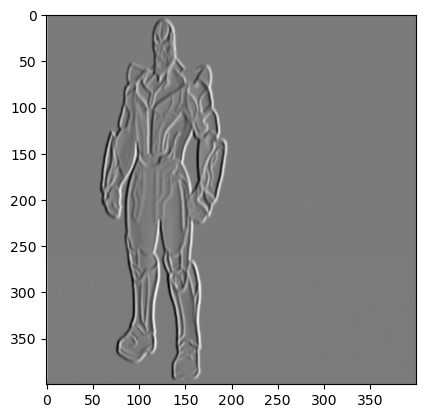

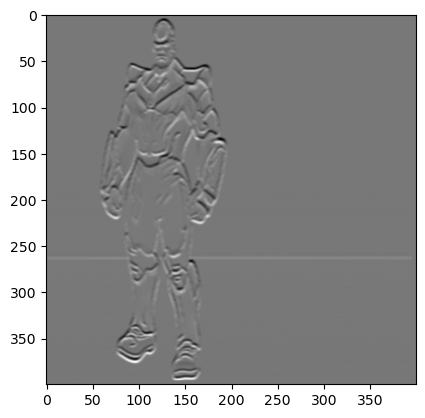

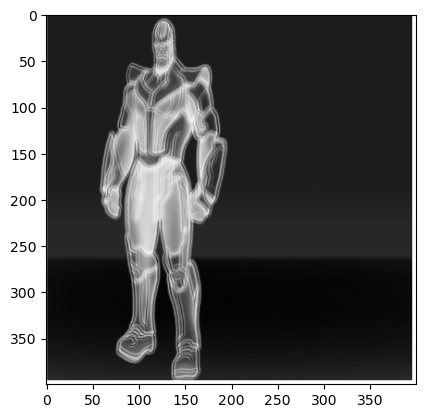

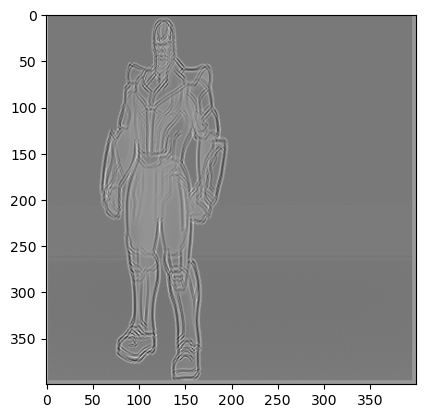

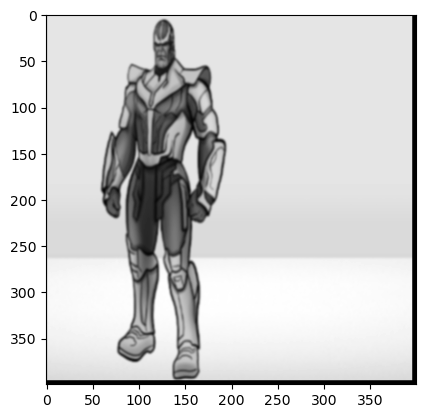

this is the number of feature vectors; 5 and this is the shape of each vector in this (1600,)
this is the shape of the feature matrix: (5, 1600)


In [31]:
thanos_path = "./classification/train_thanos.png"
thanos_image = cv2.imread(thanos_path)
# plt.imshow(thanos_image)
# plt.show()
thanos_gray = cv2.cvtColor(thanos_image, cv2.COLOR_BGR2GRAY)
thanos_resized = cv2.resize(thanos_gray, (400, 400))
# plt.imshow(thanos_resized)
# plt.show()
filtered_images_thanos = []
for filter in filter_bank:
    filtered_image = conv2D(thanos_resized, filter, 2, 1)
    filtered_images_thanos.append(filtered_image)
    plt.imshow(filtered_image, cmap='gray')
    plt.show()

feature_vectors_thanos = []
thanos_feature_matrix = np.zeros((len(filtered_images_thanos), 1600)) 
for idx, filtered_image in enumerate(filtered_images_thanos):
    pooled_image = average_pooling(filtered_image, 10, 10)
    feature_vector = pooled_image.reshape(-1)
    feature_vectors_thanos.append(feature_vector)
    thanos_feature_matrix[idx, :] = feature_vector

print(f"this is the number of feature vectors; {len(feature_vectors_thanos)} and this is the shape of each vector in this {feature_vectors_thanos[0].shape}")
print(f"this is the shape of the feature matrix: {thanos_feature_matrix.shape}")


In [33]:
test_folder = "./classification/test/"
test_images = []
feature_vectors_test = []

for filename in os.listdir(test_folder):
    test_image_path = os.path.join(test_folder, filename)
    test_image = cv2.imread(test_image_path)
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    test_image_resized = cv2.resize(test_image_gray, (400, 400))
    test_images.append(test_image_resized)

for test_image in test_images:
    each_image_filters = []
    for filter in filter_bank:
        filtered_image = conv2D(test_image, filter, 2, 1)
        each_image_filters.append(filtered_image)
    feature_vector_test = np.zeros((len(each_image_filters), 1600))
        
    for i, filtered_image in enumerate(each_image_filters):
        pooled_image = average_pooling(filtered_image, 10, 10)
        feature_vector = pooled_image.reshape(-1)
        feature_vector_test[i,:] = feature_vector
    feature_vectors_test.append(feature_vector_test)

# now we have all the feature vectors for all the test_images in the feature_vectors_test matrix
print(len(feature_vectors_test))

4


In [34]:
print(feature_vectors_test[0].shape)

(5, 1600)


In [35]:
spidey_feature_matrix = np.array(feature_vectors_spidey)
distances_spidey = []
for feature_vector_test in feature_vectors_test:
    distances = np.linalg.norm(spidey_feature_matrix-feature_vector_test, axis=1)
    distances_spidey.append(distances)
print(distances_spidey)


[array([ 25749.89801397,  15806.34989339, 114257.74108149,   2637.18013266,
         2737.45961469]), array([ 25800.14006992,  14037.43958019, 136745.66670714,   3183.73030054,
         3269.14930621]), array([ 23069.15176784,  21919.92907538, 132062.68523489,   3040.8378928 ,
         3161.76598787]), array([27351.26678285, 15739.04294897, 77985.85867408,  1680.35319606,
        1887.92288492])]


In [36]:
thanos_feature_matrix = np.array(feature_vectors_thanos)
distances_thanos = []
for feature_vector_test in feature_vectors_test:
    distances = np.linalg.norm(thanos_feature_matrix-feature_vector_test, axis=1)
    distances_thanos.append(distances)
print(distances_thanos)


[array([21633.58908582, 13506.84311002, 63499.39587731,  1426.76591107,
        1532.15462822]), array([ 23818.78764636,  11529.53197697, 117678.37844929,   2741.17659002,
         2814.66307083]), array([ 21338.49118696,  21105.1900392 , 137897.79105106,   3191.05626603,
         3299.99086303]), array([ 26628.96648991,  14419.86124929, 122030.88821499,   2797.50114266,
         2926.46378169])]


In [37]:
classifications = []
for i, test_image_path in enumerate(os.listdir(test_folder)):
    min_distance_spidey = np.min(distances_spidey[i])
    min_distance_thanos = np.min(distances_thanos[i])

    if min_distance_spidey < min_distance_thanos:
        classifications.append("Spider-Man")
    else:
        classifications.append("Thanos")

# Print the classifications
for i, test_image_path in enumerate(os.listdir(test_folder)):
    print(f"Image: {test_image_path} is : {classifications[i]}")

Image: test_thanos1.png,is : Thanos
Image: test_thanos2.jpg,is : Thanos
Image: test_spidey2.jpg,is : Spider-Man
Image: test_spidey1.jpg,is : Spider-Man
